In [1]:
# readfile is for reading yaml and sqlite3 files
# graph is to draw a 2D plan of the factory
# time is to calculate all the times and detect anomalies .

from PJdilly.readfile import reader
from PJdilly.graph import plot2D 
from PJdilly.time import calc_time 
YAML_FILE='./data/graph.yaml'
DB_FILE='./data/sandbox.db'

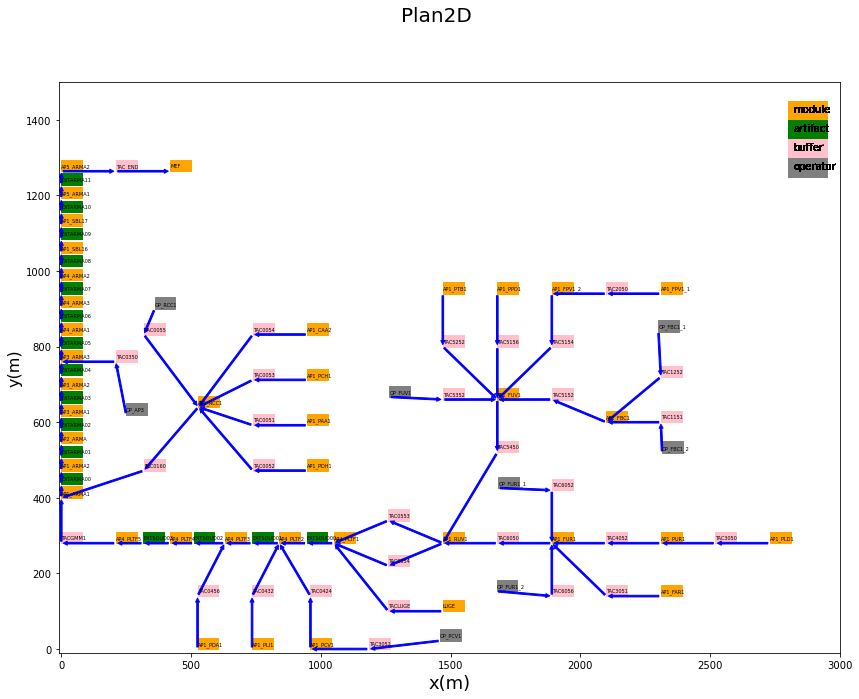

In [2]:
plot2D.plot_items(YAML_FILE)

In [3]:
# This part calculte circle of time,  I select all the data from 'DF109BFD_Exits' Table, sort them by time, 
# Then I think the duration of the machine is the difference between two timestamps, finally I take the mean value of that duration
calc_time.circle(DB_FILE,'module','AP1_PLI1ILOT1')

Circle of time of module='AP1_PLI1ILOT1' from 'DF109BFD_Exits'


157.27508208682963

In [4]:
# This function is doing the same thing ,but it is using 'DF109BFD_Buffers' table for buffers
calc_time.circle(DB_FILE,'buffer','AP4_PLTFTAC0432_F')

Circle of time of module='AP4_PLTFTAC0432_F' from 'DF109BFD_Buffers'


79.26261699394384

In [5]:
# This function take the mean duration of all events for selected module.
calc_time.MTTR(DB_FILE,'AP1_PLI1ILOT1')
#%
# This function calculte the MTTF by  (temps de cycle * nombre de pièces produites) / (nombre d'événements bloquants - 1)
# time of circle is using the function above, number of product is the length of the timestamps-1
calc_time.MTTF(DB_FILE,'AP1_PLI1ILOT1')

MTTR of module='AP1_PLI1ILOT1' from 'DF109BFD_Exits'
MTTF of module='AP1_PLI1ILOT1' from 'DF109BFD_Exits' and 'DF109BFD_Events'


109.41395939086294

In [6]:
# This function detects anomalies, which is totally my thoughts, so maybe wrong..
# 1. First it calculate the circle of time for a module(mean value)
# 2. Next for a module it takes two timestamps, and calculate the duration.
# 3. Next, the function search 'DF109BFD_Events' and 'DF109BFD_Teams' table between these two timestamps
# and caculate the totol duration of events and teams.
# if the duration of step 3 is > (the time for events and teams + weight* circle time) then I think there is something wrong

calc_time.Anomaly(DB_FILE,'AP1_PLI1ILOT1',weight=5)

something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604297330
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604311831
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604363924
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604385439
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604434652
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604444478
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604463973
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604546142
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604548822
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604559585
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604576489
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604589533
something maybe wrong for module 'AP1_PLI1ILOT1'' at timestamp of 1604596929